# Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Import the training data set

In [7]:
try:
    taxi_dur_train_df = pd.read_csv("./taxi_duration_new_train.csv")
except:
    taxi_dur_train_df = pd.read_csv("./taxi_duration_train.csv")

# Explore the training data set

In [8]:
taxi_dur_train_df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day_of_week,pickup_day_date,pickup_mth,pickup_yr,trip_euc_dist
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,14,3,2016,1.497580
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,12,6,2016,1.804374
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,19,1,2016,6.381090
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,6,4,2016,1.484566
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,26,3,2016,1.187842


In [9]:
taxi_dur_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 17 columns):
Unnamed: 0            1458644 non-null int64
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
pickup_day_of_week    1458644 non-null object
pickup_day_date       1458644 non-null int64
pickup_mth            1458644 non-null int64
pickup_yr             1458644 non-null int64
trip_euc_dist         1458644 non-null float64
dtypes: float64(5), int64(7), object(5)
memory usage: 189.2+ MB


## 1. Check to see if we have any null values in the data set

In [5]:
for each_column in taxi_dur_train_df.columns:
    if (taxi_dur_train_df[each_column].isnull().values.any()):
        print("There are null values in column \'" + each_column + "\'.")

## 2. Check out how many vendors we have

In [7]:
vendors = list(set(taxi_dur_train_df['vendor_id']))
print("There are " + str(len(vendors)) + " different types of vendors.")

There are 2 different types of vendors.


### a. Check out the proportion of vendors in the data set

In [9]:
total_rows = taxi_dur_train_df.shape[0]
for each_vendor in vendors:
    num_vendor_rows = len(taxi_dur_train_df.loc[taxi_dur_train_df['vendor_id'] == each_vendor])
    print("Vendor ID #" + str(each_vendor) + " constitutes " + ("{:.2f}").format((num_vendor_rows / total_rows) * 100) + "% of the total number of rows of data.")

Vendor ID #1 constitutes 46.50% of the total number of rows of data.
Vendor ID #2 constitutes 53.50% of the total number of rows of data.


### b. Visualize the vendor proportion

Text(0, 0.5, 'Number of Trips')

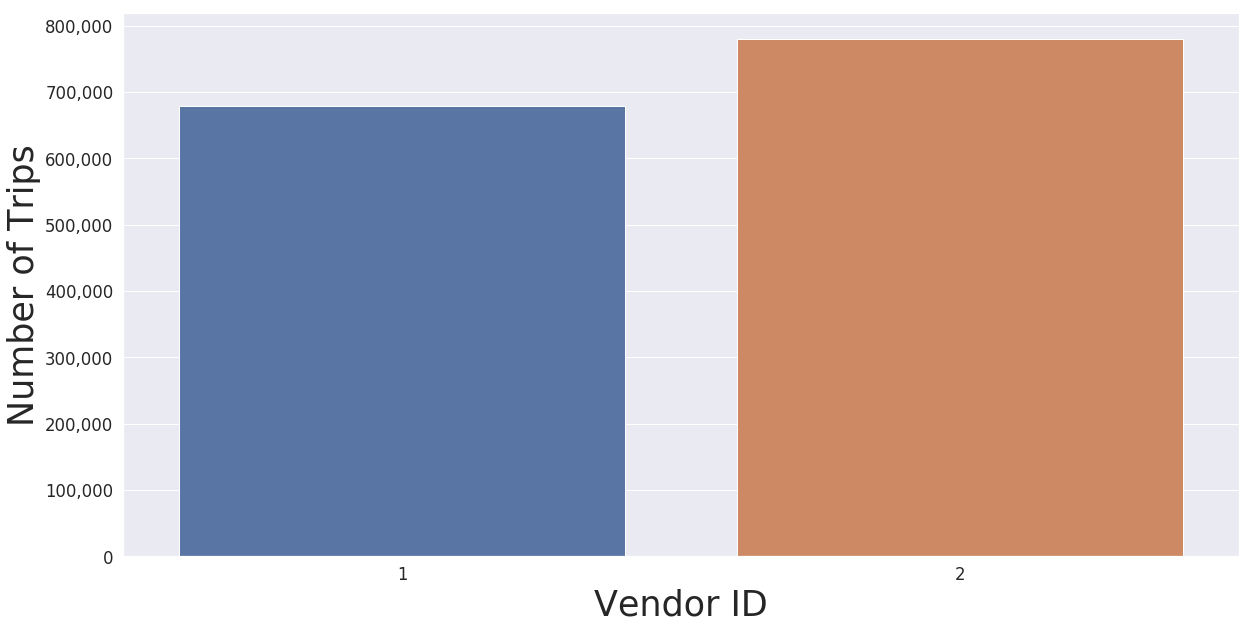

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
fmt = "{x:,.0f}"

ax = sns.countplot(
    x='vendor_id',
    data=taxi_dur_train_df,
)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))
ax.set_xlabel("Vendor ID", fontsize=35)
ax.set_ylabel("Number of Trips", fontsize=35)

## 3. Split the datetime objects in different columns: Day of the Week, Date of the Month, Month, and Year

### a. Convert the existing columns in Pandas datetime objects

In [11]:
taxi_dur_train_df['pickup_datetime'] = pd.to_datetime(taxi_dur_train_df['pickup_datetime'])
taxi_dur_train_df['dropoff_datetime'] = pd.to_datetime(taxi_dur_train_df['dropoff_datetime'])

### b. Create a columns for Day of the Week of Pickup, Date of the Month, Month, and Year

In [12]:
# Getting a Day of the Week for the pickup
taxi_dur_train_df['pickup_day_of_week'] = taxi_dur_train_df['pickup_datetime'].dt.day_name()

# Getting the day's date of the pickup
taxi_dur_train_df['pickup_day_date'] = taxi_dur_train_df['pickup_datetime'].dt.day

# Getting the month of the pickup
taxi_dur_train_df['pickup_mth'] = taxi_dur_train_df['pickup_datetime'].dt.month

# Getting the year of the pickup
taxi_dur_train_df['pickup_yr'] = taxi_dur_train_df['pickup_datetime'].dt.year

# Getting the time of the pickup
taxi_dur_train_df['pickup_time'] = taxi_dur_train_df['pickup_datetime'].dt.time

# Getting the time of the dropoff
taxi_dur_train_df['dropoff_time'] = taxi_dur_train_df['dropoff_datetime'].dt.time

In [13]:
taxi_dur_train_df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day_of_week,pickup_day_date,pickup_mth,pickup_yr,trip_euc_dist,pickup_time,dropoff_time
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,14,3,2016,1.497580,17:24:55,17:32:30
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,12,6,2016,1.804374,00:43:35,00:54:38
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,19,1,2016,6.381090,11:35:24,12:10:48
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,6,4,2016,1.484566,19:32:31,19:39:40
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,26,3,2016,1.187842,13:30:55,13:38:10


## 4. Explore the trip durations of the various trips in the data set

### a. Find the longest trip duration (This is so that we can identify if there are super long trips that span more than a day)

In [4]:
longest_trip = np.max(taxi_dur_train_df['trip_duration'])
print("The longest trip is " + str(longest_trip) + " seconds,\n" + "or " + "{:.2f}".format(longest_trip / 60.0) + " minutes,\n" + "or " + "{:.2f}".format(longest_trip / 3600.0) + " hours,\n" + "or " + "{:.2f}".format(longest_trip / 86400.0) + " days.")

The longest trip is 3526282 seconds,
or 58771.37 minutes,
or 979.52 hours,
or 40.81 days.


Holy @$!#, 40.81 days in a taxi?! There has to be some input error... I think.

### b. Check out the distribution of the trip durations

In [10]:
trip_dur_mean = np.mean(taxi_dur_train_df['trip_duration'])
trip_dur_median = np.median(taxi_dur_train_df['trip_duration'])

print("The MEAN duration across all trips is " + "{:.2f}".format(trip_dur_mean) + " seconds,\n" + "or, " + "{:.2f}".format(trip_dur_mean / 60) + " minutes.\n\n")
print("The MEDIAN duration across all trips is " + "{:.2f}".format(trip_dur_median) + " seconds,\n" + "or, " + "{:.2f}".format(trip_dur_median / 60) + " minutes.")

The MEAN duration across all trips is 959.49 seconds,
or, 15.99 minutes.


The MEDIAN duration across all trips is 662.00 seconds,
or, 11.03 minutes.


### c. Visualize the trip durations via a box plot to get an understanding of the trip duration distribution

Text(0.5, 0, 'Trip Duration (in seconds)')

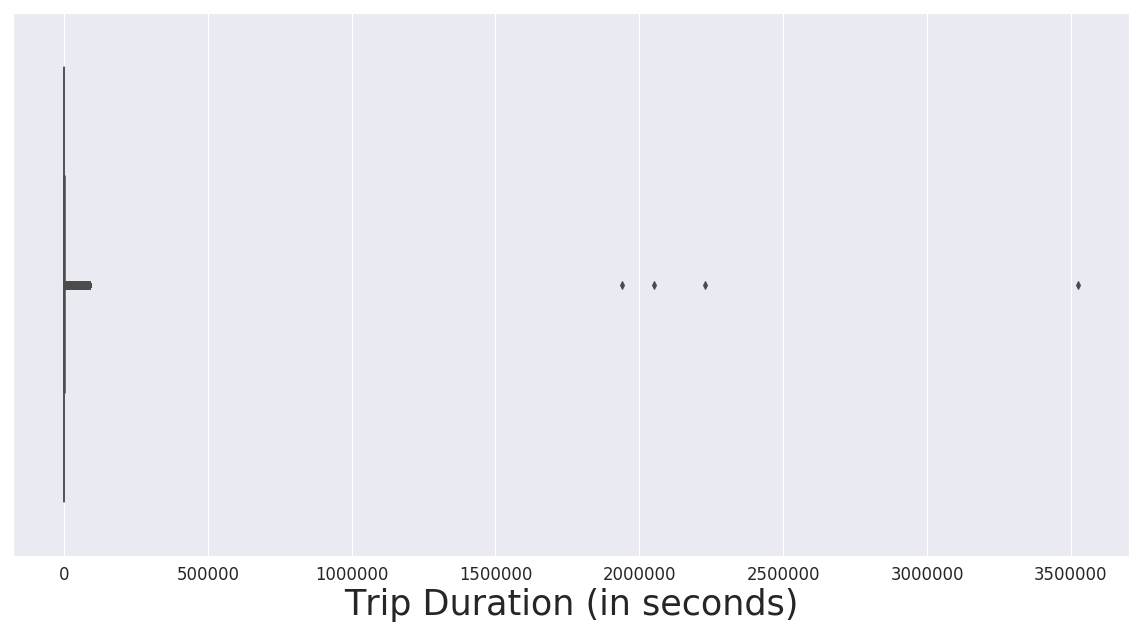

In [17]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.boxplot(
    x=taxi_dur_train_df['trip_duration'],
)

ax.set_xlabel("Trip Duration (in seconds)", fontsize=35)

### d. Re-visualize the trip durations with a box plot, this time without the outliers

Text(0.5, 0, 'Trip Duration (in seconds)')

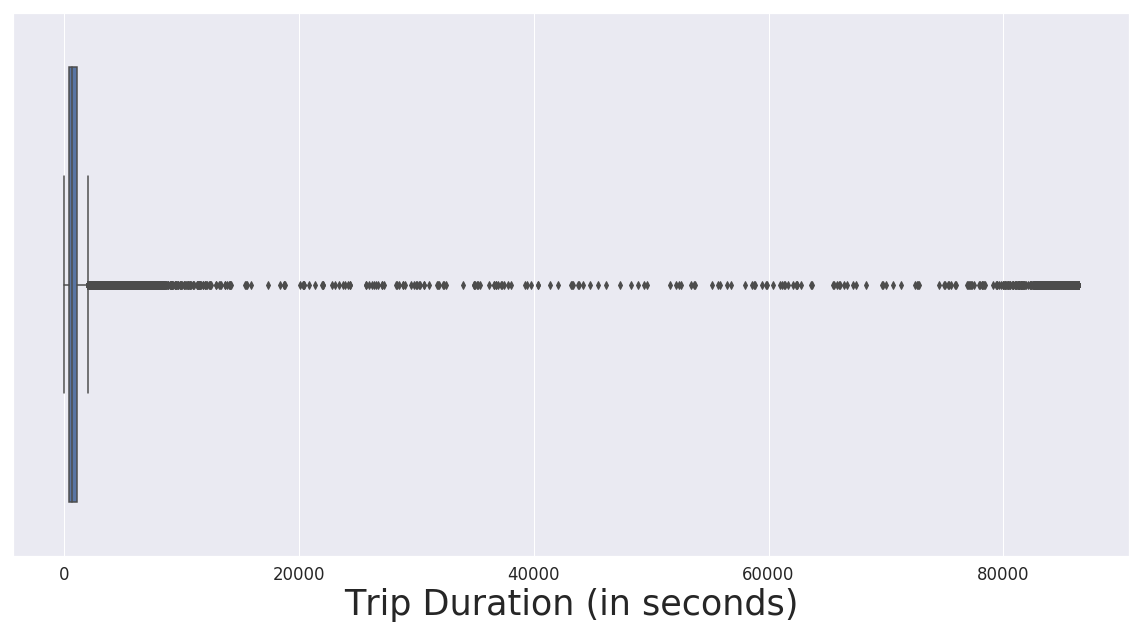

In [16]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.boxplot(
    x=taxi_dur_train_df['trip_duration'].loc[taxi_dur_train_df['trip_duration'] < 500000],
)

ax.set_xlabel("Trip Duration (in seconds)", fontsize=35)

### e. Narrowing it down further


Text(0.5, 0, 'Trip Duration (in seconds)')

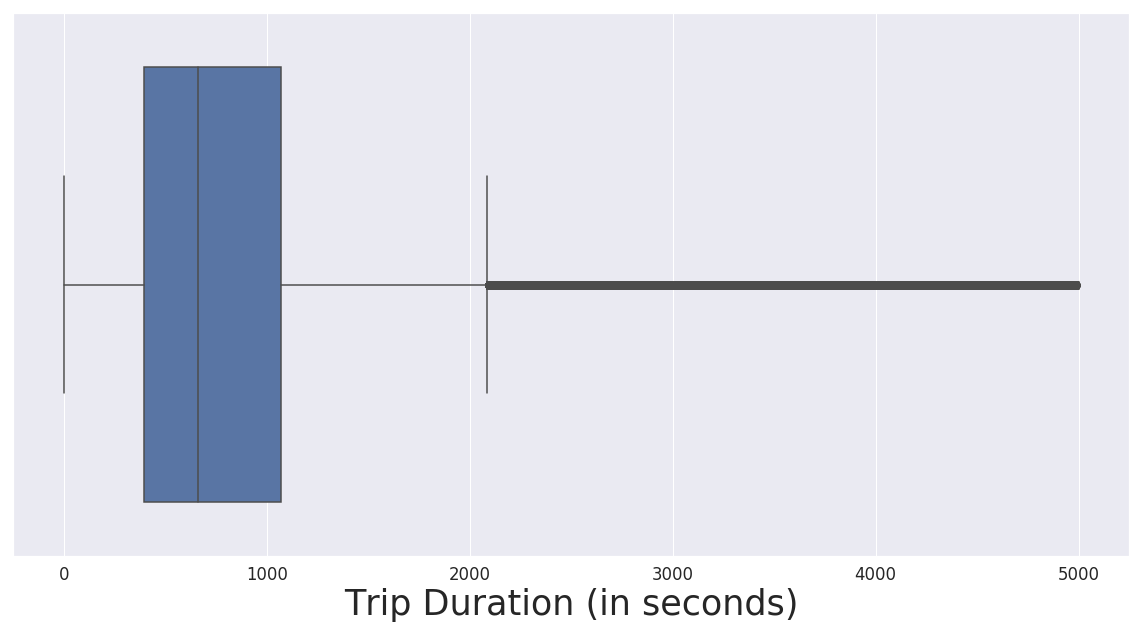

In [15]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.boxplot(
    x=taxi_dur_train_df['trip_duration'].loc[taxi_dur_train_df['trip_duration'] < 5000],
)

ax.set_xlabel("Trip Duration (in seconds)", fontsize=35)

Okay, so it looks like we have some outliers of our own.

## 5. Explore the date time and trip of the trips

### a. Check out the proportion of trips by Day of the Week (pickup_day_of_week)

In [5]:
days_of_week = list(set(taxi_dur_train_df['pickup_day_of_week']))
total_rows = taxi_dur_train_df.shape[0]

for each_day_of_week in days_of_week:
    rows_for_day = len(taxi_dur_train_df.loc[taxi_dur_train_df['pickup_day_of_week'] == each_day_of_week])
    print("Trips made on " + each_day_of_week + " constitute " + "{:.2f}".format((rows_for_day / total_rows) * 100) + "% of the training data set rows.")

Trips made on Sunday constitute 13.39% of the training data set rows.
Trips made on Friday constitute 15.32% of the training data set rows.
Trips made on Thursday constitute 14.98% of the training data set rows.
Trips made on Wednesday constitute 14.41% of the training data set rows.
Trips made on Saturday constitute 15.14% of the training data set rows.
Trips made on Tuesday constitute 13.90% of the training data set rows.
Trips made on Monday constitute 12.85% of the training data set rows.


### Visualizing the proportion of trips by Day of the Week

Text(0, 0.5, 'Number of Trips')

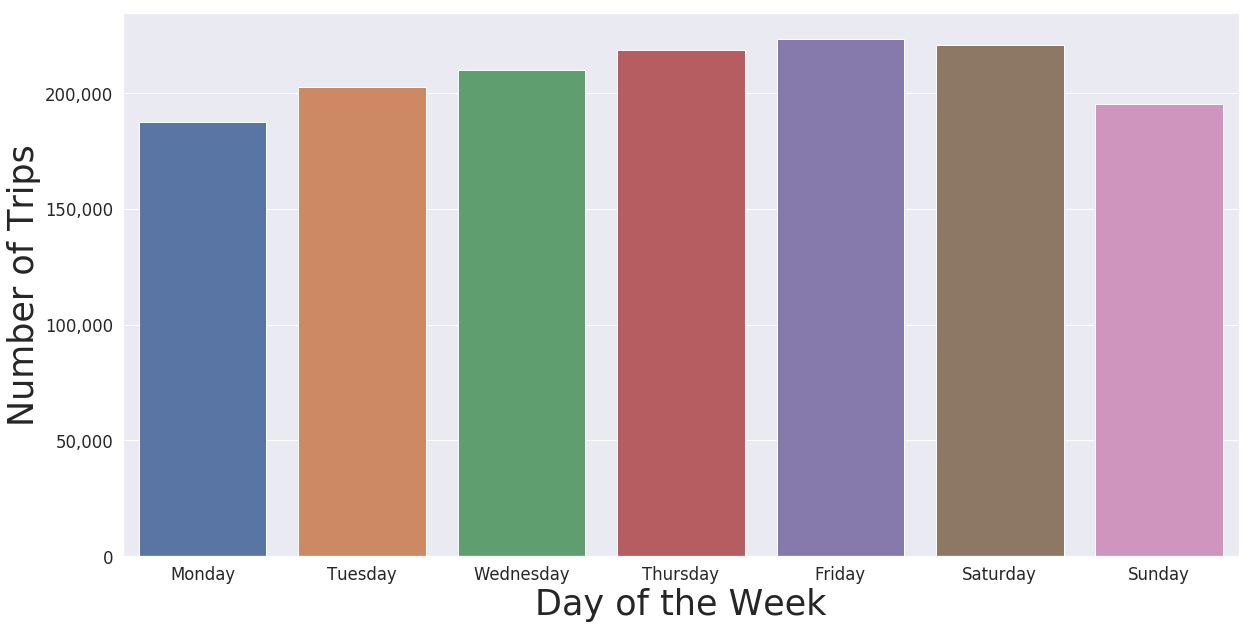

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
fmt = "{x:,.0f}"

ax = sns.countplot(
    x='pickup_day_of_week',
    data=taxi_dur_train_df,
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))
ax.set_xlabel("Day of the Week", fontsize=35)
ax.set_ylabel("Number of Trips", fontsize=35)

### b. Check out the proportion of trips by date (pickup_day_date)

In [6]:
dates_of_mth = list(set(taxi_dur_train_df['pickup_day_date']))
total_rows = taxi_dur_train_df.shape[0]

for each_date in dates_of_mth:
    rows_for_each_date = len(taxi_dur_train_df.loc[taxi_dur_train_df['pickup_day_date'] == each_date])
    print("{:.2f}".format((rows_for_each_date / total_rows) * 100) + "% of trips were made on the " + str(each_date) + " of the month.")

3.20% of trips were made on the 1 of the month.
3.27% of trips were made on the 2 of the month.
3.29% of trips were made on the 3 of the month.
3.40% of trips were made on the 4 of the month.
3.44% of trips were made on the 5 of the month.
3.39% of trips were made on the 6 of the month.
3.34% of trips were made on the 7 of the month.
3.31% of trips were made on the 8 of the month.
3.40% of trips were made on the 9 of the month.
3.35% of trips were made on the 10 of the month.
3.35% of trips were made on the 11 of the month.
3.43% of trips were made on the 12 of the month.
3.38% of trips were made on the 13 of the month.
3.46% of trips were made on the 14 of the month.
3.41% of trips were made on the 15 of the month.
3.50% of trips were made on the 16 of the month.
3.36% of trips were made on the 17 of the month.
3.29% of trips were made on the 18 of the month.
3.38% of trips were made on the 19 of the month.
3.37% of trips were made on the 20 of the month.
3.31% of trips were made on t

### Visualizing how trips are distributed within an average month

Text(0, 0.5, 'Number of Trips')

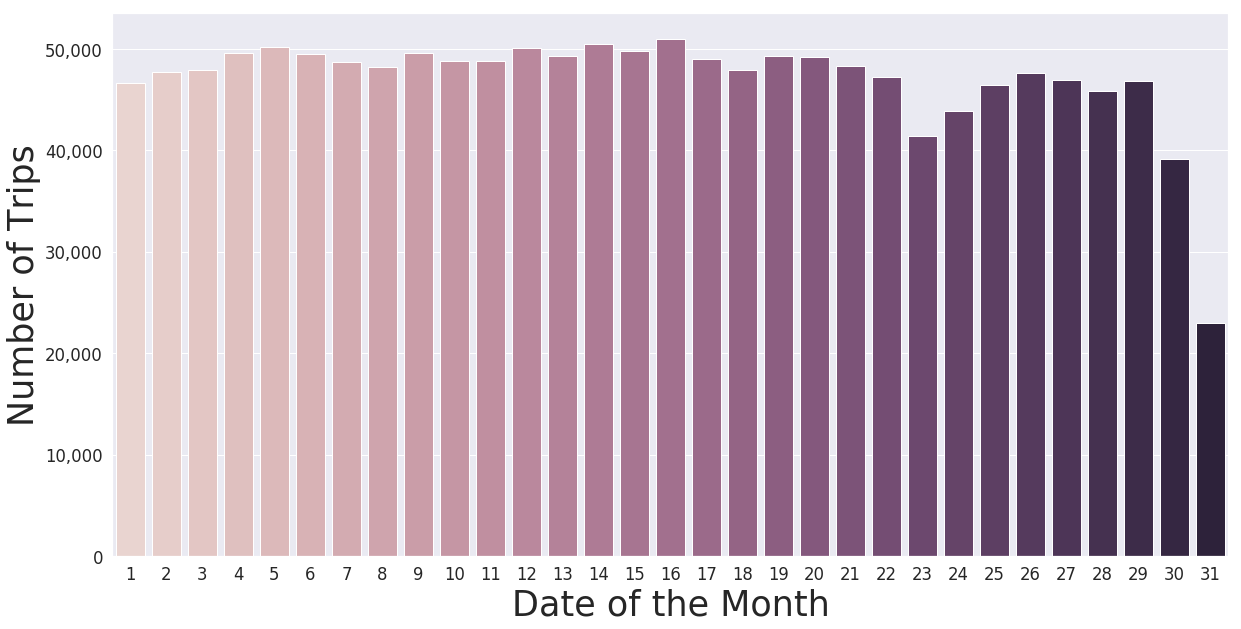

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
fmt = "{x:,.0f}"

ax = sns.countplot(
    x='pickup_day_date',
    data=taxi_dur_train_df,
    palette=sns.cubehelix_palette(31)
)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))
ax.set_xlabel("Date of the Month", fontsize=35)
ax.set_ylabel("Number of Trips", fontsize=35)

### c. Check out the proportion of trips by month (pickup_mth)

In [7]:
mth_to_name_dict = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

mths = list(set(taxi_dur_train_df['pickup_mth']))
total_rows = taxi_dur_train_df.shape[0]

for each_mth in mths:
    rows_for_each_mth = len(taxi_dur_train_df.loc[taxi_dur_train_df['pickup_mth'] == each_mth])
    print("{:.2f}".format((rows_for_each_mth / total_rows) * 100) + "% of trips were made in " + str(mth_to_name_dict[each_mth]) + ".")

15.75% of trips were made in Jan.
16.34% of trips were made in Feb.
17.56% of trips were made in Mar.
17.25% of trips were made in Apr.
17.04% of trips were made in May.
16.06% of trips were made in Jun.


### Visualizing how trips are distributed across the months

Text(0, 0.5, 'Number of Trips')

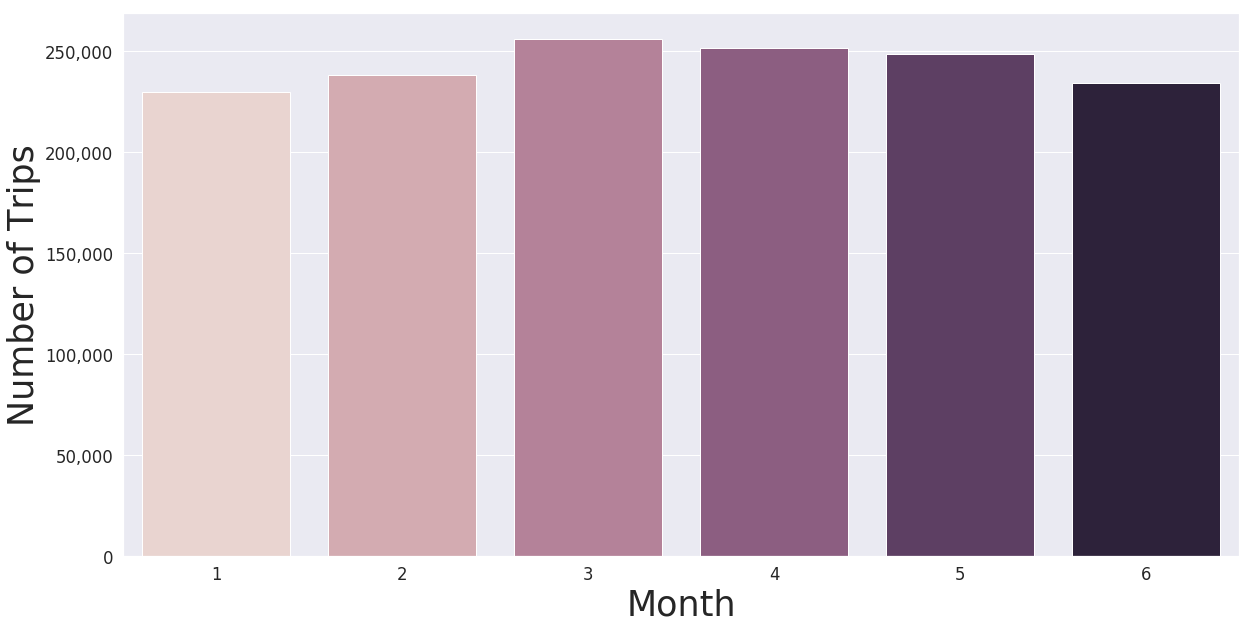

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
fmt = "{x:,.0f}"

ax = sns.countplot(
    x='pickup_mth',
    data=taxi_dur_train_df,
    palette=sns.cubehelix_palette(6)
)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))
ax.set_xlabel("Month", fontsize=35)
ax.set_ylabel("Number of Trips", fontsize=35)

### Visualizing the number of trips for each day of the week, over the 6 months

In [132]:
# Re-organize the data into the format we need for the heatmap first

temp_df = taxi_dur_train_df.drop(
        columns=[
            'id', 
            'vendor_id',
            'pickup_datetime',
            'dropoff_datetime',
            'passenger_count',
            'pickup_longitude',
            'pickup_latitude',
            'dropoff_longitude',
            'dropoff_latitude',
            'store_and_fwd_flag',
            'pickup_day_date',
            'pickup_yr',
            'trip_euc_dist',
            'trip_duration'
        ]
    )

heatmap_df = pd.DataFrame(columns=['day_of_week', 'mth', 'trips'])

days_of_week = list(set(taxi_dur_train_df['pickup_day_of_week']))
mths = list(set(taxi_dur_train_df['pickup_mth']))

for each_mth in mths:
    for each_day in days_of_week:
        heatmap_df = heatmap_df.append(
            {
                'day_of_week': each_day,
                'mth': each_mth,
                'trips': len(taxi_dur_train_df['pickup_day_of_week'].loc[(taxi_dur_train_df['pickup_day_of_week'] == each_day) & (taxi_dur_train_df['pickup_mth'] == each_mth)])
            },
            ignore_index=True
        )
        
heatmap_df.head()

,day_of_week,mth,trips
0,Sunday,1,32751
1,Friday,1,41470
2,Thursday,1,32367
3,Wednesday,1,31314
4,Saturday,1,34701


In [133]:
heatmap_df['day_of_week'] = pd.Categorical(heatmap_df['day_of_week'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
heatmap_df['mth'] = heatmap_df['mth'].astype('int64')
heatmap_df['trips'] = heatmap_df['trips'].astype('int64')

In [134]:
heatmap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
day_of_week    42 non-null category
mth            42 non-null int64
trips          42 non-null int64
dtypes: category(1), int64(2)
memory usage: 1.1 KB


In [135]:
heatmap_df = heatmap_df.pivot("day_of_week", "mth", "trips")

In [136]:
heatmap_df.head()

mth,1,2,3,4,5,6
day_of_week,,,,,,
Monday,27231,36158,29967,29863,35465,28734
Tuesday,29873,31106,39315,32538,39376,30541
Wednesday,31314,32762,40949,33054,32642,39415
Thursday,32367,34707,42418,34164,33996,40922
Friday,41470,35446,35585,43925,34016,33091


Text(148.5, 0.5, 'Day of the Week')

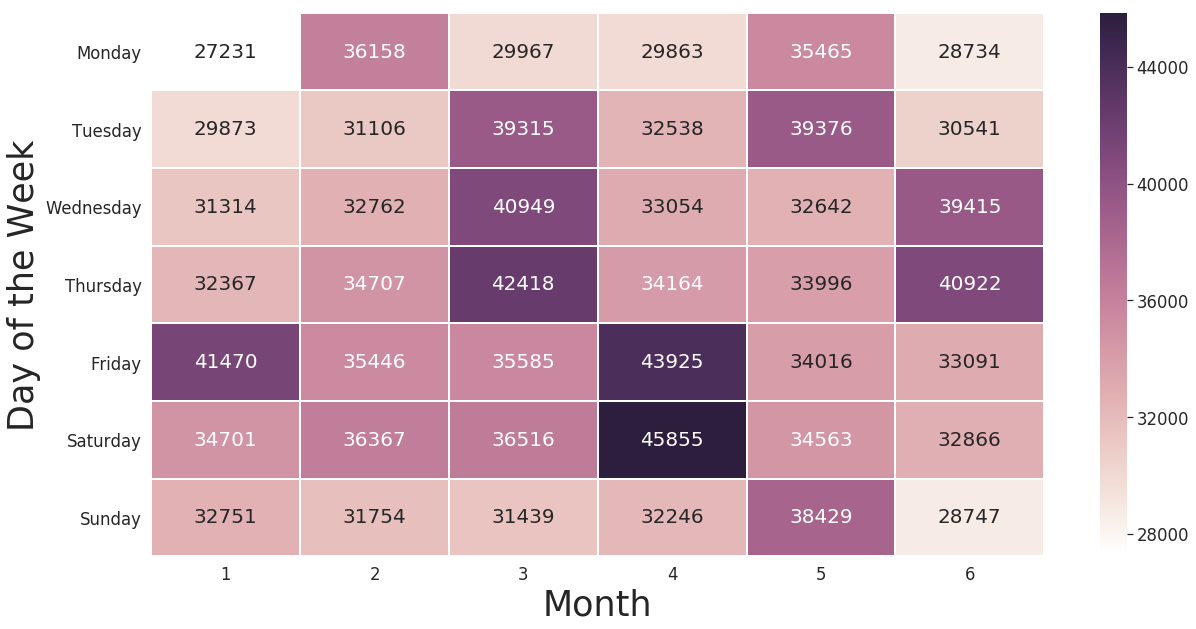

In [144]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.heatmap(
    data=heatmap_df,
    annot=True,
    annot_kws={"size": 20},
    fmt="d",
    linewidths=1,
    cmap=sns.cubehelix_palette(light=1, as_cmap=True)
)

ax.set_xlabel("Month", fontsize=35)
ax.set_ylabel("Day of the Week", fontsize=35)

## 6. Checkout the pickup and dropoff (Euclidean) distances

### A function to help us calculate the arc distances on Earth

In [49]:
# Credits to: https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [50]:
def calc_trip_distance(row):
    row['trip_euc_dist'] = haversine_np(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude'])
    return row

In [51]:
taxi_dur_train_df = taxi_dur_train_df.apply(calc_trip_distance, axis=1)

In [52]:
taxi_dur_train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day_of_week,pickup_day_date,pickup_mth,pickup_yr,trip_euc_dist
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,14,3,2016,1.497580
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,12,6,2016,1.804374
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,19,1,2016,6.381090
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,6,4,2016,1.484566
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,26,3,2016,1.187842


### At this point, export the data into a new CSV file

In [53]:
# taxi_dur_train_df.to_csv("taxi_duration_new_train.csv")

### Finding more about the mean and median distances travelled across all trips

In [146]:
mean_trip_dist = np.mean(taxi_dur_train_df['trip_euc_dist'])
median_trip_dist = np.median(taxi_dur_train_df['trip_euc_dist'])

print("The MEAN distance travelled across trips is " + "{:.2f}".format(mean_trip_dist) + "km.")
print("The MEDIAN distance travelled across trips is " + "{:.2f}".format(median_trip_dist) + "km.")

The MEAN distance travelled across trips is 3.44km.
The MEDIAN distance travelled across trips is 2.09km.


### Visualizing the trip distances with a box plot

Text(0.5, 0, 'Trip Distance (in kilometres)')

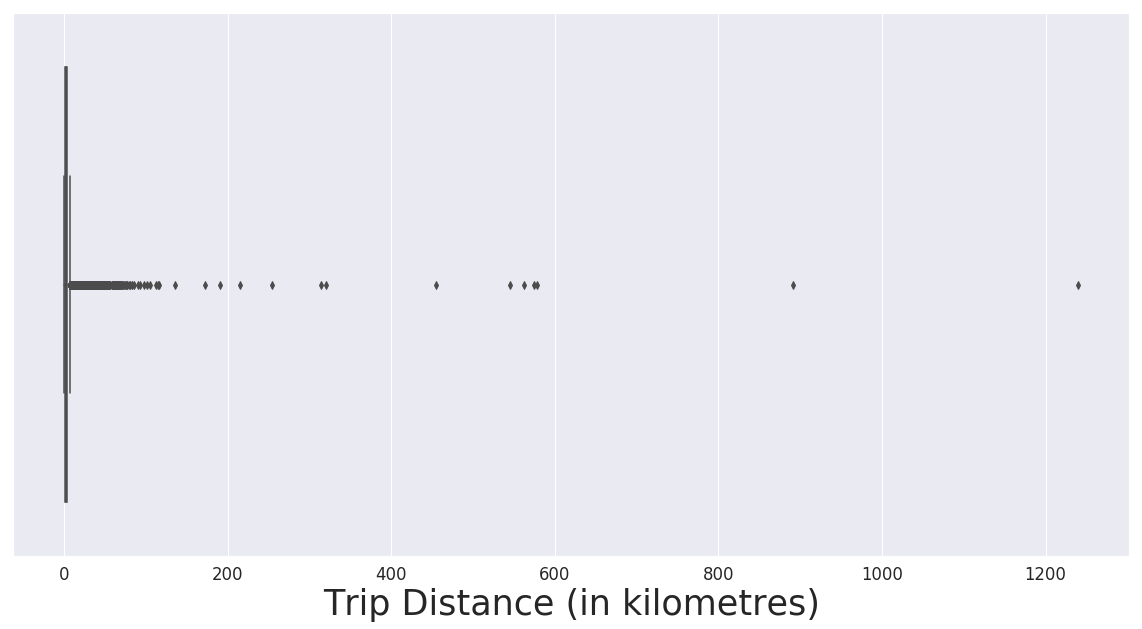

In [147]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.boxplot(
    x=taxi_dur_train_df['trip_euc_dist'],
)

ax.set_xlabel("Trip Distance (in kilometres)", fontsize=35)

### Narrowing down further

Text(0.5, 0, 'Trip Distance (in kilometres)')

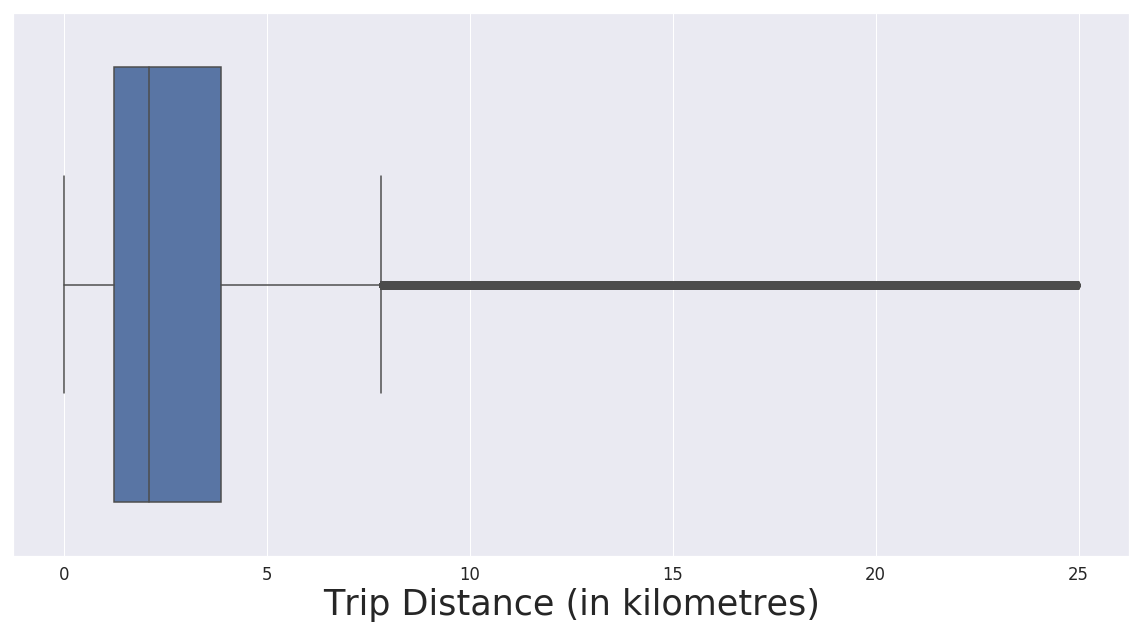

In [149]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.boxplot(
    x=taxi_dur_train_df['trip_euc_dist'].loc[taxi_dur_train_df['trip_euc_dist'] < 25],
)

ax.set_xlabel("Trip Distance (in kilometres)", fontsize=35)

### Visualizing the pickup and dropoff locations

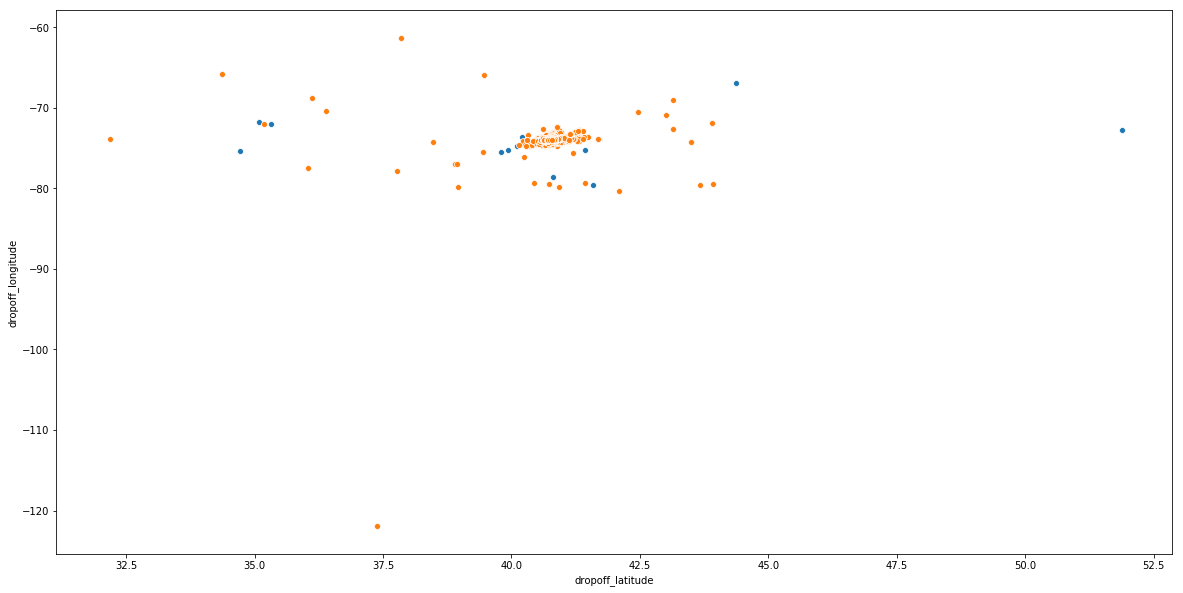

In [6]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.scatterplot(
    x='pickup_latitude',
    y='pickup_longitude',
    data=taxi_dur_train_df
)

ax = sns.scatterplot(
    x='dropoff_latitude',
    y='dropoff_longitude',
    data=taxi_dur_train_df
)

# ax.set_xlabel("Trip Distance (in kilometres)", fontsize=35)

# 7. Checkout the distribution of the passenger counts

In [56]:
passenger_counts = list(set(taxi_dur_train_df['passenger_count']))
print("There are " + str(len(passenger_counts)) + " types of passenger counts.")

There are 10 types of passenger counts.


In [60]:
total_rows = taxi_dur_train_df.shape[0]

for each_passenger_count_type in passenger_counts:
    rows_of_passenger_count_type = len(taxi_dur_train_df.loc[taxi_dur_train_df['passenger_count'] == each_passenger_count_type])
    print("{:.2f}".format((rows_of_passenger_count_type / total_rows) * 100) + "% of rows (" + str(rows_of_passenger_count_type) + " row(s)) consist of trips with " + str(each_passenger_count_type) + " passengers.")

0.00% of rows (60 row(s)) consist of trips with 0 passengers.
70.86% of rows (1033540 row(s)) consist of trips with 1 passengers.
14.42% of rows (210318 row(s)) consist of trips with 2 passengers.
4.11% of rows (59896 row(s)) consist of trips with 3 passengers.
1.95% of rows (28404 row(s)) consist of trips with 4 passengers.
5.35% of rows (78088 row(s)) consist of trips with 5 passengers.
3.31% of rows (48333 row(s)) consist of trips with 6 passengers.
0.00% of rows (3 row(s)) consist of trips with 7 passengers.
0.00% of rows (1 row(s)) consist of trips with 8 passengers.
0.00% of rows (1 row(s)) consist of trips with 9 passengers.


# 8. Conduct final feature engineering for the data set to be used for training the prediction model

In [47]:
taxi_dur_train_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day_of_week,pickup_day_date,pickup_mth,trip_euc_dist,pickup_time,dropoff_time
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,1,14,3,1.497580,17:24:55,17:32:30
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,7,12,6,1.804374,00:43:35,00:54:38
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,2,19,1,6.381090,11:35:24,12:10:48
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,3,6,4,1.484566,19:32:31,19:39:40
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,6,26,3,1.187842,13:30:55,13:38:10


## Drop redundant columns

In [40]:
taxi_dur_train_df.drop(columns=['Unnamed: 0', 'id', 'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime', 'pickup_yr'], inplace=True)

## Replace the 'pickup_day_of_week' columns to a numerical categorical value

In [42]:
day_of_week_dict = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

taxi_dur_train_df['pickup_day_of_week'] = taxi_dur_train_df['pickup_day_of_week'].apply(lambda x: day_of_week_dict[x])

In [48]:
taxi_dur_train_df.to_csv("taxi_duration_predict_train.csv")